# Arbres binaires

## Introduction

Un arbre binaire est un arbre de degré 2

On donne les noms `gauche` et `droite` aux enfants d’un noeud. 

Cette toponymie est importante. Si un noeud n'a qu'un enfant, il faut savoir si c'est l'enfant gauche ou droit. Cela influence par exemple les parcours.

On s’y intéresse particulièrement car ils sont 
* les plus simples


* souvent aussi performant que des structures plus complexes


* à la base de la majorité des autres arbres 
    * tas
    * arbre binaires de recherche
    * arbres AVL
    * arbres rouge-noir
    * arbres d’Andersson
    * …

## Mise en oeuvre

Les noeuds d'un arbre binaire sont typiquement de la forme

In [1]:
class Noeud:
    def __init__(self,val):
        self.donnee = val
        self.gauche = None
        self.droite = None
        
    def __str__(self): return "{}".format(self.donnee)

On peut le construire manuellement 

In [2]:
racine  = a = Noeud('A')
a.gauche = b = Noeud('B'); a.droite = c = Noeud('C')
b.gauche = d = Noeud('D'); b.droite = e = Noeud('E')
c.gauche = f = Noeud('F')

Pour l'affichage, il est important de pouvoir distinguer si un enfant unique est à gauche ou à droite. 

C'est pourquoi pour les enfants uniques nous affichons le symbole ⌀ pour les enfants absents. 

Pour simplifier la visualisation, nous ne le faisons pas pour les enfants des feuilles. 

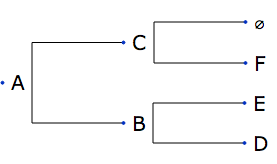

In [3]:
import include.helpers as h
h.afficher_arbre_binaire(racine)

Illustrons notre choix avec une fonction d'affichage indenté.

In [4]:
def affichage_complet(R,niveau):
    if R:
        print('\t'*niveau,R.donnee)
        for r in ( R.gauche, R.droite ):
            affichage_complet(r,niveau+1)
    else:
        print('\t'*niveau,"-")

In [5]:
affichage_complet(racine,0)

 A
	 B
		 D
			 -
			 -
		 E
			 -
			 -
	 C
		 F
			 -
			 -
		 -


In [6]:
def affichage_simplifie(R,niveau):
    if R:
        print('\t'*niveau,R.donnee)
        if R.gauche or R.droite:
            for r in ( R.gauche, R.droite ):
                affichage_simplifie(r,niveau+1)
    else:
        print('\t'*niveau,"-")

In [7]:
affichage_simplifie(racine,0)

 A
	 B
		 D
		 E
	 C
		 F
		 -


# Parcours en profondeur 

Il définit 3 ordres selon que l'on traite les éléments **avant**, **entre** ou **après** les 2 appels récursifs.

In [8]:
def parcours_pre_ordonne(R,fn):
    if R:
        fn(R)
        parcours_pre_ordonne(R.gauche)
        parcours_pre_ordonne(R.droite)

def parcours_symetrique(R,fn):
    if R:
        parcours_symetrique(R.gauche)
        fn(R)
        parcours_symetrique(R.droite)
        
def parcours_post_ordonne(R,fn):
    if R:
        parcours_post_ordonne(R.gauche)
        parcours_post_ordonne(R.droite)
        fn(R)

On peut aussi écrire un parcours en profondeur plus général prenant 3 fonctions en paramètres d'entrée

In [9]:
def parcours_en_profondeur(R,pre,sym,post):
    if R:
        pre(R)
        parcours_en_profondeur(R.gauche,pre,sym,post)
        sym(R)
        parcours_en_profondeur(R.droite,pre,sym,post)
        post(R)

Les parcours pré-ordonné, symétrique et post-ordonné s'écrivent alors

In [10]:
def no_op(R): pass

def parcours_pre_ordonne(R,fn): 
    parcours_en_profondeur(R,fn,no_op,no_op)

def parcours_symetrique(R,fn): 
    parcours_en_profondeur(R,no_op,fn,no_op)

def parcours_post_ordonne(R,fn): 
    parcours_en_profondeur(R,no_op,no_op,fn)

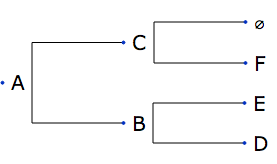

In [11]:
h.afficher_arbre_binaire(racine)

# Effectuer le parcours pré-ordonné de cet arbre

In [12]:
def afficher_noeud(R): print(R,end = " ")
parcours_pre_ordonne(racine, afficher_noeud)

A B D E C F 

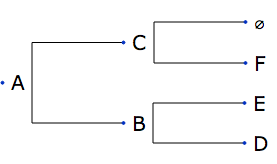

In [13]:
h.afficher_arbre_binaire(racine)

# Effectuer le parcours symétrique de cet arbre

In [14]:
parcours_symetrique(racine, afficher_noeud)

D B E A F C 

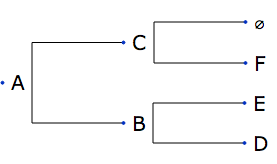

In [15]:
h.afficher_arbre_binaire(racine)

# Effectuer le parcours post-ordonné de cet arbre

In [16]:
parcours_post_ordonne(racine, afficher_noeud)

D E B F C A 

## Parcours en largeur 

In [17]:
from queue import Queue

def parcoursEnLargeur(R):
    Q = Queue()
    Q.put(R)             
    while not Q.empty():
        n = Q.get()           
        if n:
            print(n, end=" ")
            Q.put(n.gauche) 
            Q.put(n.droite)   

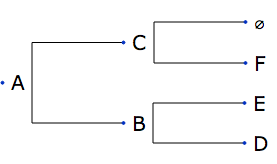

In [18]:
h.afficher_arbre_binaire(racine)

# Effectuer le parcours en largeur de cet arbre

In [19]:
parcoursEnLargeur(racine)

A B C D E F 

<table style="width: 100%; border: 0px">
<tr style="background-color:white; border:0px">
<td style="width: 120px; border: 0px">
    <img src="https://heig-vd.ch/ResourcePackages/WhiteFox/assets/images/logo-heig-vd.svg" height=200px align=left >
    </td>
    <td style="vertical-align: middle; border: 0px" height=200px>
    <p style="text-align: left">
        <a href="https://ocuisenaire.github.io/ASD1-notebooks/">ASD1 Notebooks on GitHub.io</a>
 </p>        
<p style="text-align: left">
© Olivier Cuisenaire, 2018 </p>
</td>
</tr>
</table>